In [1]:
# install NLTK (Natural Language Toolkit) and download vader lexion for sentiment analysis
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set ggplot style
plt.style.use('ggplot')

# import data
spotify_answers = pd.read_csv('./spotify_cares.csv', index_col=None)
support_requests = pd.read_csv('./support_requests.csv', index_col=None)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stefan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# convert to datetime created_at text column
spotify_answers['created_at'] = pd.to_datetime(
    spotify_answers['created_at'],
    format='%a %b %d %H:%M:%S +0000 %Y'
)
support_requests['created_at'] = pd.to_datetime(
    support_requests['created_at'],
    format='%a %b %d %H:%M:%S +0000 %Y'
)
spotify_answers = spotify_answers.set_index('created_at')
support_requests = support_requests.set_index('created_at')

In [3]:
# drop unused columns
spotify_answers.drop(columns=['Unnamed: 0','index'], inplace=True)
support_requests.drop(columns=['Unnamed: 0','index'], inplace=True)

In [4]:
# fill 'NA' to avoid error during conversion
support_requests['text'] = support_requests['text'].fillna('')
spotify_answers['text'] = spotify_answers['text'].fillna('')

# Convert text column to list of characters
requests_list_letters = support_requests['text'].apply(list)
answers_list_letters = spotify_answers['text'].apply(list)

# Flatten the list
flat_requests_list = [char for sublist in requests_list_letters for char in sublist]
flat_answers_list = [char for sublist in answers_list_letters for char in sublist]

# Get distinct letters
distinct_letters_requests = set(flat_requests_list)
distinct_letters_answers = set(flat_answers_list)
display((' '.join(map(str, distinct_letters_requests.union(distinct_letters_answers)))))

'ر ₱ ʎ م G ä 🎤 ー 🍆 🏃 ˙ ø ホ 😇 ⚡ 💞 🎧 楽 👏 🙄 🥂 😜 🥀 ∀ ∩ F ş 😛 😞 💝 😖 _ ブ に 📝 制 6 ザ 👻 U 🎵 ン 👀 , ö 🙌 ♂ 🙇 ร ò 生 🙊 📷 ☝ س L ƃ ❤ ✍ 3 😪 ü 。 🤜 🔧 曲 😄 ř 😏 こ ǝ 🤨 → う や ๆ J 💎 ᴉ フ 🖤 ♡ 🇪 🏽 Ö 🤤 默 ¿ 場 🆘 😘 c 一 Ş ユ ’ 🚪 🤩 🎼 😩 ね 🌝 😸 し ♀ è Δ ป ♥ あ が S y ス ã ، + ح 確 ط 💓 l « 🇸 å 😃 時 🤪 P 👑 🤖 ¯ 🎄 í \r 🤶 😝 お » い ‘ n 😁 د と 🥁 🤛 な 📻 💵 😕 🖒 พ 😳 🎅 🤔 \\ [ 🤬 💗 K マ £ E 😌 ? 🤣 😚 g 那 — ャ ę ɔ 🕵 T x … 🧀 ɯ 4 💪 🙏 ざ を 🏆 で 💚 ม 9 😨 ☔ 用 ʍ ⬇ 💘 は 🔌 š っ V 😉 ❗ X 🎁 😰 🤧 😆 😢 ñ パ I / ６ 限 詳 ا ☕ 🍎 😎 🤞 🌰 ト ů \u200b ɥ 😲 ´ 🧙 ご け ش H 🕺 早 😥 o ı ✨ 🐻 🏾 く 😤 😀 ่ ^ ☹ a 🇮 🗺 ɐ 😂 ك k 🏻 z 🤓 R ル p 🐍 🔝 決 利 🗣 ` 💁 🙃 💃 j B ! 🦄 🤙 😫 A e ✌ อ | ص 8 - 👂 👹 😬 ï ไ า M î 😮 7 Q 🇩 📱 ğ 👐 ち 💔 " 1 💖 👎 😐 ‼ 💯 😽 🏼 🤘 É わ 🍻 👊 D 💜 ʇ ; ل W 🤦 🇬 英 日 “ * 🤗 ☺ Π 🇧 = 🔍 😊 Á ⛄ . 💛 غ ě 😈 é 🎬 ⌚ 、 ف ➡ 💆 ž @ 🎂 ❣ ذ ه r 見 น v 🔋 & Z イ 間 ب ] 😱 🙋 拝 👍 2 😭 🤠 ✋ ~ 😣 و ع ん 🙉 % の 👌 \n 😦 👋 コ C : t 🤷 😋 🎈 ت \u200d Y ➔ ê み h „ 🇺 ∞ す w ❄ 🖕 ó 😡 👇 m O 🌟 ç á 💻   ら s ま 5 i u 💋 😟 😓 🚫 d \xa0 🇦 – 💀 ¡ ʻ ɹ だ ن 🎀 合 🏿 ) 🙁 て タ ✅ 認 ق 🔥 ️ 💕 🌷 🎻 ツ ッ た 😔 0 再 Ø り ย { レ 😍 ú 🔊 ✊ 🎉 😯 👽 ( ي 🇨 ë 🙈 q 😧 ว 😅 ั 😶 € 🌍 Ó 🇵 シ # ⭐ 送 ô \' 🎶 č 

We will keep only alphabetical signs and we will exclude emojis, chinese and korean symbols, numbers and other not relevant signs.

In [5]:
# let's write the function
def sort_and_remove_non_alphabetical(text):
    # Remove Twitter handles like @username
    text = re.sub(r'@\w+\s*', '', text)
    # Remove non-alphabetical symbols using regular expression
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Split the text into words
    words = text.split()
    # Join the sorted words back into a single string
    new_text = ' '.join(words)
    return new_text

clean_requests = support_requests['text'].apply(sort_and_remove_non_alphabetical)
clean_answers = spotify_answers['text'].apply(sort_and_remove_non_alphabetical)

In [6]:
# Create an instance of the SentimentIntensityAnalyzer class
sid = SentimentIntensityAnalyzer()

In [7]:
# implement sentiment analysis
clean_requests_scores = clean_requests.apply(sid.polarity_scores)
clean_answers_scores = clean_answers.apply(sid.polarity_scores)

# generate sentiment daily averages
sentiment_requests = clean_requests_scores.apply(lambda x: x['compound'])
sentiment_answers = clean_answers_scores.apply(lambda x: x['compound'])


In [8]:
# Resample the DataFrame to 1-day intervals and calculate the count
daily_counts_requests = sentiment_requests.resample('1D').count()
daily_counts_answers = sentiment_answers.resample('1D').count()

# Get the index of 1-day intervals where the count is greater than 100
valid_dates_requests = daily_counts_requests[daily_counts_requests > 100].index
valid_dates_answers = daily_counts_answers[daily_counts_answers > 100].index

# Filter the original DataFrame based on the valid dates
filtered_requests = sentiment_requests[sentiment_requests.index.floor('D').isin(valid_dates_requests)]
filtered_answers = sentiment_answers[sentiment_answers.index.floor('D').isin(valid_dates_answers)]

# Resample the filtered DataFrame to 1-day intervals and calculate the count
daily_counts_requests_filtered = filtered_requests.resample('1D').count()
daily_counts_answers_filtered = filtered_answers.resample('1D').count()

# Resample the filtered DataFrame to 1-day intervals and calculate the mean
daily_mean_requests_filtered = filtered_requests.resample('1D').mean()
daily_mean_answers_filtered = filtered_answers.resample('1D').mean()

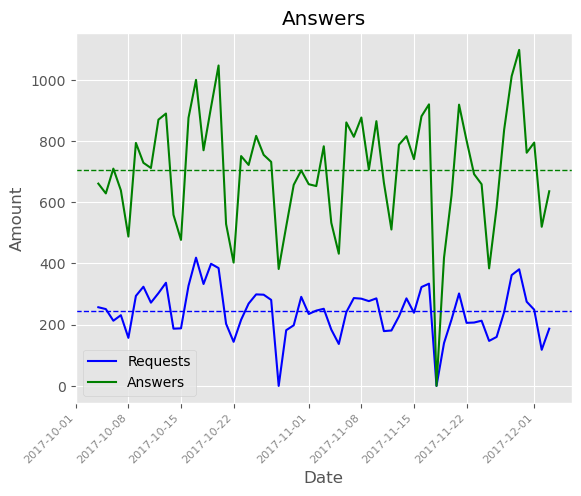

In [9]:
# make a graph of average requests and answers data count
average_requests_count = np.mean(daily_counts_requests_filtered)
average_answers_count = np.mean(daily_counts_answers_filtered)

plt.plot(
    daily_counts_requests_filtered.index,
    daily_counts_requests_filtered,
    color='blue'
)

plt.plot(
    daily_counts_answers_filtered.index,
    daily_counts_answers_filtered,
    color='green'
)

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Answers')
plt.legend(('Requests','Answers'))

plt.xticks(rotation=45, fontsize=8, alpha=.7, horizontalalignment='right')
plt.axhline(y=average_requests_count, color='blue', linestyle='--', linewidth=1, label='Average')
plt.axhline(y=average_answers_count, color='green', linestyle='--', linewidth=1, label='Average')

plt.show()

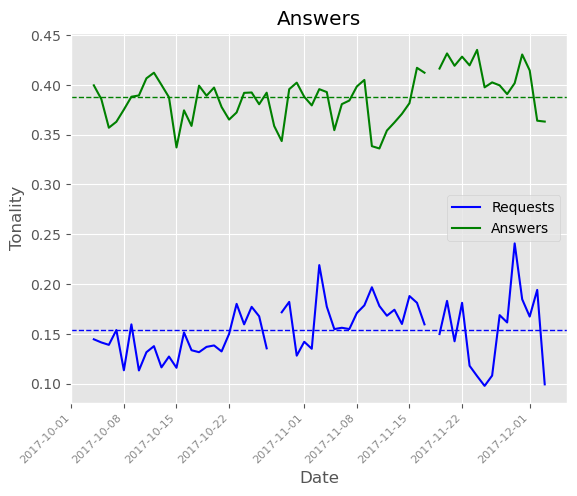

In [10]:
# make a graph of daily average requests and answers compound
average_requests = np.mean(daily_mean_requests_filtered)
average_answers = np.mean(daily_mean_answers_filtered)

plt.plot(
    daily_mean_requests_filtered.index,
    daily_mean_requests_filtered,
    color='blue'
)
plt.plot(
    daily_mean_answers_filtered.index,
    daily_mean_answers_filtered,
    color='green'
)

plt.xlabel('Date')
plt.ylabel('Tonality')
plt.title('Answers')
plt.legend(('Requests','Answers'))

plt.xticks(rotation=45, fontsize=8, alpha=.7, horizontalalignment='right')
plt.axhline(y=average_requests, color='blue', linestyle='--', linewidth=1, label='Average')
plt.axhline(y=average_answers, color='green', linestyle='--', linewidth=1, label='Average')

plt.show()

<b>We do have about 200 daily requests and 700 daily answers accordingly. Tonality of requests is around 0.16 and tonality of answers is 0.39 on the average. These metrics could be used for KPI development.</b>